<a href="https://colab.research.google.com/github/sjvkishore/code/blob/master/ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('https://query.data.world/s/jsozzecl2r4terwmkx7qcliqh6r4yz')

In [22]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
#Survival features are AGE, FARE, SEX
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [44]:
def df_perc(df):  
  return (df.isnull().sum()/len(df) ) * 100
df_perc(df)

pclass        0.076336
survived      0.076336
name          0.076336
sex           0.076336
age          20.152672
sibsp         0.076336
parch         0.076336
ticket        0.076336
fare          0.152672
embarked      0.229008
boat         62.900763
body         90.763359
home.dest    43.129771
dtype: float64

In [13]:
#EDA
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [20]:
df.sex.head

<bound method NDFrame.head of 0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object>

In [21]:
100 * pd.crosstab(df.survived, df.sex,normalize=True)

sex,female,male
survived,,
0.0,9.702063,52.100840
1.0,25.897632,12.299465


In [28]:
if (df['age'] <= 16):
  df.age = 0
elif ((df['age'] > 16) & (df.age <= 32)):
  df.age = 1
elif ((df.age > 32) & (df.age <= 48)):
  df.age = 2  
elif ((df.age > 48) & (df.age <= 64)):
  df.age = 3
else:
  df.age = 4

ValueError: ignored

In [0]:
def age_group() : 
  pd.cut(df.age, bins = [0,16,32,48,64,200], labels= [0,1,2,3,4])

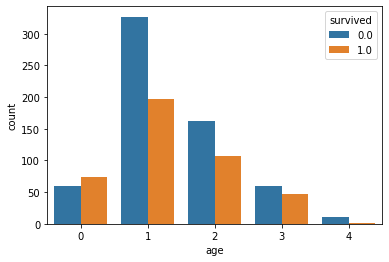

In [31]:
sns.countplot(age_group, hue = 'survived', data = df)

In [33]:
#Data cleaning:
df_perc

pclass        0.076336
survived      0.076336
name          0.076336
sex           0.076336
age          20.152672
sibsp         0.076336
parch         0.076336
ticket        0.076336
fare          0.152672
cabin        77.480916
embarked      0.229008
boat         62.900763
body         90.763359
home.dest    43.129771
dtype: float64

In [0]:
df.drop('cabin',inplace=True,axis=1)

In [45]:
df_perc(df)

pclass        0.076336
survived      0.076336
name          0.076336
sex           0.076336
age          20.152672
sibsp         0.076336
parch         0.076336
ticket        0.076336
fare          0.152672
embarked      0.229008
boat         62.900763
body         90.763359
home.dest    43.129771
dtype: float64

In [47]:
df.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [0]:
#impute embark category with 's':

df.embarked = df.embarked.fillna('S')


In [49]:
df_perc(df)

pclass        0.076336
survived      0.076336
name          0.076336
sex           0.076336
age          20.152672
sibsp         0.076336
parch         0.076336
ticket        0.076336
fare          0.152672
embarked      0.000000
boat         62.900763
body         90.763359
home.dest    43.129771
dtype: float64

In [50]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
df = df.drop(['name','ticket','home.dest','body','boat'], axis =1)

In [55]:
df.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


In [56]:
df.dtypes

pclass      float64
survived    float64
sex          object
age         float64
sibsp       float64
parch       float64
fare        float64
embarked     object
dtype: object

In [0]:
df.sex.replace(['female','male'],[0,1],inplace=True)

In [58]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0.0,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,1.0,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,0.0,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,1.0,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,0.0,25.0000,1.0,2.0,151.5500,S
...,...,...,...,...,...,...,...,...
1305,3.0,0.0,0.0,NaN,1.0,0.0,14.4542,C
1306,3.0,0.0,1.0,26.5000,0.0,0.0,7.2250,C
1307,3.0,0.0,1.0,27.0000,0.0,0.0,7.2250,C
1308,3.0,0.0,1.0,29.0000,0.0,0.0,7.8750,S


In [60]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df.embarked = le.fit_transform(df.embarked)
df.head(15)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0.0,29.0000,0.0,0.0,211.3375,2
1,1.0,1.0,1.0,0.9167,1.0,2.0,151.5500,2
2,1.0,0.0,0.0,2.0000,1.0,2.0,151.5500,2
3,1.0,0.0,1.0,30.0000,1.0,2.0,151.5500,2
4,1.0,0.0,0.0,25.0000,1.0,2.0,151.5500,2
5,1.0,1.0,1.0,48.0000,0.0,0.0,26.5500,2
6,1.0,1.0,0.0,63.0000,1.0,0.0,77.9583,2
7,1.0,0.0,1.0,39.0000,0.0,0.0,0.0000,2
8,1.0,1.0,0.0,53.0000,2.0,0.0,51.4792,2
9,1.0,0.0,1.0,71.0000,0.0,0.0,49.5042,0


In [0]:
from fancyimpute import IterativeImputer

In [0]:
df_columns = df.columns

In [65]:
li = IterativeImputer()
li.fit(df)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

IterativeImputer(_max_value=nan, _min_value=nan, fill_method='zero', imputation_order='ascending', initial_strategy='mean', max_value=None, min_value=None, missing_values=nan, n_features_with_missing_=7, n_iter=10, n_nearest_features=None, normalizer=None, predictor=None, random_state=None, sample_posterior=False, verbose=False)

In [67]:
df1 = li.transform(df)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [68]:
df_clean = pd.DataFrame(df1)
df_clean.columns = df_columns
df_clean.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0.0,29.0000,0.0,0.0,211.3375,2.0
1,1.0,1.0,1.0,0.9167,1.0,2.0,151.5500,2.0
2,1.0,0.0,0.0,2.0000,1.0,2.0,151.5500,2.0
3,1.0,0.0,1.0,30.0000,1.0,2.0,151.5500,2.0
4,1.0,0.0,0.0,25.0000,1.0,2.0,151.5500,2.0


In [69]:
df_perc(df_clean)

pclass      0.0
survived    0.0
sex         0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
embarked    0.0
dtype: float64

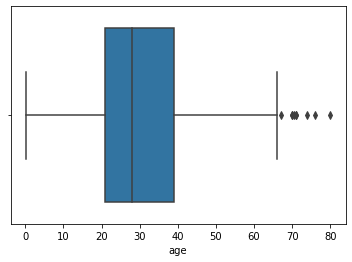

In [70]:
#original dataset:
sns.boxplot(df.age)

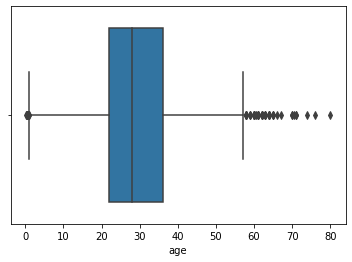

In [71]:
#checking Imputation is correct ?
#after imputation:
sns.boxplot(df_clean.age)

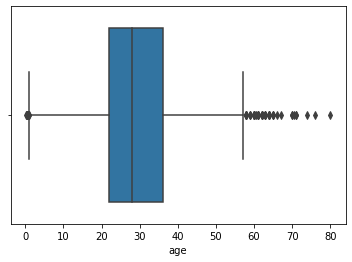

In [73]:
#dropping records which are unrealistic:
df_clean.drop(df_clean.index[df_clean['age']<= 0], inplace=True)
sns.boxplot(df_clean['age'])

In [79]:
(df_clean['age']== 0).any()

False

In [80]:
df_clean.loc[df_clean.fare>300]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
49,1.0,1.0,1.0,36.0,0.0,1.0,512.3292,0.0
50,1.0,1.0,0.0,58.0,0.0,1.0,512.3292,0.0
183,1.0,1.0,1.0,35.0,0.0,0.0,512.3292,0.0
302,1.0,1.0,0.0,35.0,0.0,0.0,512.3292,0.0


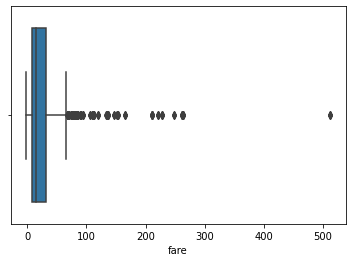

In [81]:
sns.boxplot(df_clean['fare'])

In [0]:
df_clean.drop(df_clean.index[df_clean.fare >400],inplace=True)

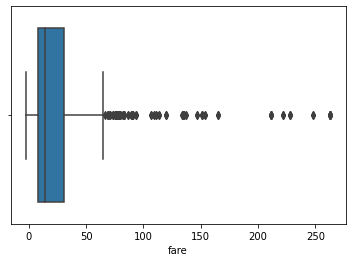

In [83]:
sns.boxplot(df_clean['fare'])

In [84]:
df_clean.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [0]:
for i in ['survived','pclass','sex', 'age', 'sibsp', 'parch', 'fare','embarked']:
  df_clean[i] = pd.to_numeric(df_clean[i])
  df_clean[i] = df_clean[i].astype(int)


In [87]:
df_clean.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29,0,0,211,2
1,1,1,1,0,1,2,151,2
2,1,0,0,2,1,2,151,2
3,1,0,1,30,1,2,151,2
4,1,0,0,25,1,2,151,2


In [0]:
for i in ['sibsp','pclass', 'parch','embarked']:
  df_clean[i] = df_clean[i].astype(str)

In [89]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1306 non-null   object
 1   survived  1306 non-null   int64 
 2   sex       1306 non-null   int64 
 3   age       1306 non-null   int64 
 4   sibsp     1306 non-null   object
 5   parch     1306 non-null   object
 6   fare      1306 non-null   int64 
 7   embarked  1306 non-null   object
dtypes: int64(4), object(4)
memory usage: 91.8+ KB


In [91]:
cat_df = df_clean[['sibsp','pclass', 'parch','embarked']]
cat_df.head()

,sibsp,pclass,parch,embarked
0,0,1,0,2
1,1,1,2,2
2,1,1,2,2
3,1,1,2,2
4,1,1,2,2


In [92]:
df_dummies = pd.get_dummies(cat_df,drop_first=True)
df_dummies.head()

,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,pclass_2,pclass_3,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,parch_9,embarked_1,embarked_2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [0]:
df_clean.drop(list(cat_df.columns), axis = 1, inplace=True)

In [94]:
df_clean.head(5)

,survived,sex,age,fare
0,1,0,29,211
1,1,1,0,151
2,0,0,2,151
3,0,1,30,151
4,0,0,25,151


In [95]:
df_clean = pd.concat([df_clean,df_dummies], axis = 1)
df_clean.head()

,survived,sex,age,fare,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,pclass_2,pclass_3,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,parch_9,embarked_1,embarked_2
0,1,0,29,211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,151,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,2,151,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,30,151,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,25,151,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [0]:
#Divide the data into train & test.
X = df_clean.drop(['survived'],axis=1)
y = df_clean.survived

In [0]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state= 93)

In [0]:
#Scaling the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [100]:
#Class Imbalance check
y_train.value_counts(normalize=True)

0    0.622538
1    0.377462
Name: survived, dtype: float64

# Modelling


## Logistic Regression:

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity/Recall: {}".format(metrics.recall_score(y_test,y_pred)))


Accuracy: 0.8061224489795918
Sensitivity/Recall: 0.7152317880794702


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression(penalty= 'l1', solver= 'saga')
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity/Recall: {}".format(metrics.recall_score(y_test,y_pred)))


Accuracy: 0.8061224489795918
Sensitivity/Recall: 0.7218543046357616


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression(class_weight= "balanced")
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity/Recall: {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.7755102040816326
Sensitivity/Recall: 0.7350993377483444


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression(class_weight= {0: .38, 1: .62})
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity/Recall: {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.7780612244897959
Sensitivity/Recall: 0.7350993377483444


In [122]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion =  'gini', min_samples_leaf = 2, min_samples_split= 26, n_estimators = 1200)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity/Recall: {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.7857142857142857
Sensitivity/Recall: 0.543046357615894


In [123]:
pd.concat((pd.DataFrame(X.columns,columns = ['Variable']),
pd.DataFrame(rf_model.feature_importances_, columns=['importance'])), axis=1).sort_values(by = 'importance', ascending=False)

,Variable,importance
0,sex,0.435200
2,fare,0.166249
1,age,0.151066
10,pclass_3,0.100415
19,embarked_2,0.043633
9,pclass_2,0.021707
11,parch_1,0.020279
3,sibsp_1,0.013941
12,parch_2,0.012229
18,embarked_1,0.010836
